In [27]:
import sys
sys.path.append('..')

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn

from pathlib import Path
from tqdm import tqdm
from catalyst.utils.factory import UtilsFactory
from catalyst.models.segmentation import UNet

from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
unet = UNet(in_channels=1)

checkpoint = UtilsFactory.load_checkpoint('../logs/segmentation_unet/checkpoint.None.3.pth.tar')
UtilsFactory.unpack_checkpoint(
    checkpoint, model=unet
)
unet = unet.to(torch.device('cuda'))

In [16]:
data_dir = Path('/home/ecohen/varian-challenge/data/preproc')

Xs, ys = [], []
for filename in tqdm(os.listdir(data_dir)):
    if '.npz' not in filename:
        continue
    data = np.load(data_dir / filename)
    X, y = data['X'], data['Y']
    if X.shape[0] > 89 or X.shape[1] < 512:
        continue
    Xs.append(X)
    ys.append(y)
    
X_train = np.stack(Xs[:-1], axis=0).reshape(-1, 512, 512)
y_train = np.stack(ys[:-1], axis=0).reshape(-1, 512, 512)
train_data = zip(X_train, y_train)

X_valid = Xs[-1]
y_valid = ys[-1]
valid_data = zip(X_valid, y_valid)

100%|██████████| 11/11 [00:15<00:00,  1.39s/it]


In [17]:
image = torch.from_numpy(X_valid[50][None, None, :, :]).float().to(torch.device('cuda'))

In [40]:
%time result = unet.forward(image).to(torch.device('cpu'))

CPU times: user 68 ms, sys: 60 ms, total: 128 ms
Wall time: 126 ms


/home/ecohen/projects/miniconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


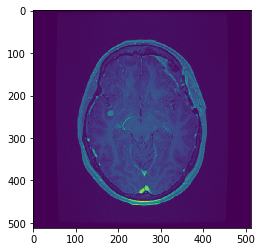

In [41]:
plt.imshow(X_valid[48]);

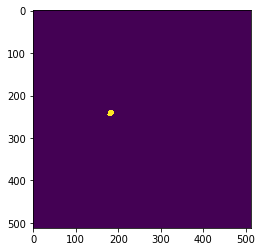

In [42]:
plt.imshow(y_valid[48]);

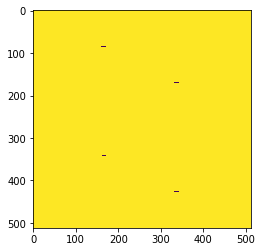

In [43]:
plt.imshow(torch.sigmoid(result[0, 0]).detach().numpy());

In [44]:
image = torch.from_numpy(X_train[52][None, None, :, :]).float().to(torch.device('cuda'))

In [45]:
result = unet.forward(image).to(torch.device('cpu'))

/home/ecohen/projects/miniconda3/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")


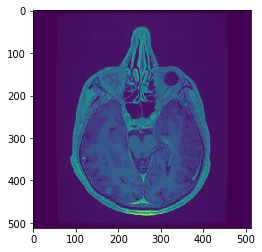

In [46]:
plt.imshow(X_train[52]);

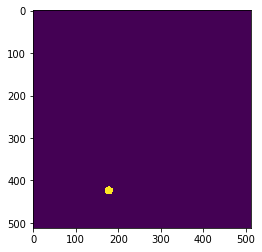

In [47]:
plt.imshow(y_train[52]);

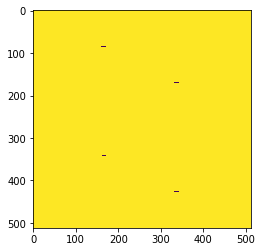

In [48]:
plt.imshow(torch.sigmoid(result[0, 0]).detach().numpy());

In [49]:
result[0, 0].max(), torch.sigmoid(result[0, 0]).max()

(tensor(-17841500160., grad_fn=<MaxBackward1>),
 tensor(4.1560e-39, grad_fn=<MaxBackward1>))

---

In [27]:
y_train.max(axis=(1, 2))[50:]

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
np.median(X_valid)

590.0

In [61]:
np.median(X_train)

648.0